In [6]:
##########################################################
# Relative Imports
##########################################################
import sys
from os.path import isfile
from os.path import join


def find_pkg(name: str, depth: int):
    if depth <= 0:
        ret = None
    else:
        d = [".."] * depth
        path_parts = d + [name, "__init__.py"]

        if isfile(join(*path_parts)):
            ret = d
        else:
            ret = find_pkg(name, depth - 1)
    return ret


def find_and_ins_syspath(name: str, depth: int):
    path_parts = find_pkg(name, depth)
    if path_parts is None:
        raise RuntimeError("Could not find {}. Try increasing depth.".format(name))
    path = join(*path_parts)
    if path not in sys.path:
        sys.path.insert(0, path)


try:
    import caldera
except ImportError:
    find_and_ins_syspath("caldera", 3)

# Caldera

In [7]:
import caldera

## Data tour

### GraphData

The primary data object used by caldera. We can generate random objects by using `GraphData.random` for testing and demo purposes...

In [25]:
from caldera.data import GraphData

data = GraphData.random(n_feat=5, e_feat=4, g_feat=3)
data

<GraphData size(n,e,g)=torch.Size([15, 1, 1]) features(n,e,g)=torch.Size([5, 4, 3])>

`GraphData` instances contain node tensor (`data.x`), edge tensor (`data.e`) and global tensor (`data.g`). They also keep graph topology
via and edge list, `data.edges`, which indicates edges by node indices. Note that this mean graphs are MultiGraphs (multiple edges between same nodes allowed)

#### node features

Each node gets a tensor. These tensors are stack into `data.x`

In [29]:
print('We have {} nodes'.format(data.x.shape[0]))
print('Each node has a feature tensor of shape {}'.format(data.x.shape[1]))
print("Overall shape: {}".format(data.x.shape))
data.x

We have 15 nodes
Each node has a tensor of shape 5
Overall shape: torch.Size([15, 5])


tensor([[-0.2561,  0.4482,  0.7056,  0.9847,  0.9111],
        [-0.2304, -0.4359, -0.9248,  1.4216,  1.1642],
        [-0.8886, -0.4438,  0.7387,  1.5487,  0.4253],
        [ 0.1481, -1.0606, -0.1148,  0.8447, -0.9782],
        [ 1.0306, -0.0861,  0.8580,  0.1885,  1.0642],
        [-0.4962,  1.7422,  1.1774,  0.3492,  1.5053],
        [ 1.7783, -0.9488,  1.7510,  1.5110, -0.6304],
        [ 0.0149, -2.4232, -0.6660,  0.6719,  0.2648],
        [ 1.8272, -0.3493, -0.5736,  0.5759,  2.4898],
        [-0.8786,  0.6716,  1.0330, -0.0818, -1.4703],
        [ 0.7344, -1.5721,  2.1205, -0.2214, -1.5946],
        [-2.1527,  0.4033,  0.8337, -0.4313,  0.6429],
        [ 0.3153,  0.1496,  1.0945,  0.2415,  0.7226],
        [ 0.5320,  0.0163,  0.2457, -0.6638, -1.1801],
        [-1.7819,  0.3855, -0.3971, -0.2051, -0.6224]])

#### edge features

Each edge gets a tensor. These tensors are stack into `data.e`

In [37]:
print('We have {} edge(s)'.format(data.e.shape[0]))
print('Each edge has a feature tensor of shape {}'.format(data.e.shape[1]))
print("Overall shape: {}".format(data.e.shape))
data.x

We have 1 edge(s)
Each edge has a feature tensor of shape 4
Overall shape: torch.Size([1, 4])


tensor([[-0.2561,  0.4482,  0.7056,  0.9847,  0.9111],
        [-0.2304, -0.4359, -0.9248,  1.4216,  1.1642],
        [-0.8886, -0.4438,  0.7387,  1.5487,  0.4253],
        [ 0.1481, -1.0606, -0.1148,  0.8447, -0.9782],
        [ 1.0306, -0.0861,  0.8580,  0.1885,  1.0642],
        [-0.4962,  1.7422,  1.1774,  0.3492,  1.5053],
        [ 1.7783, -0.9488,  1.7510,  1.5110, -0.6304],
        [ 0.0149, -2.4232, -0.6660,  0.6719,  0.2648],
        [ 1.8272, -0.3493, -0.5736,  0.5759,  2.4898],
        [-0.8786,  0.6716,  1.0330, -0.0818, -1.4703],
        [ 0.7344, -1.5721,  2.1205, -0.2214, -1.5946],
        [-2.1527,  0.4033,  0.8337, -0.4313,  0.6429],
        [ 0.3153,  0.1496,  1.0945,  0.2415,  0.7226],
        [ 0.5320,  0.0163,  0.2457, -0.6638, -1.1801],
        [-1.7819,  0.3855, -0.3971, -0.2051, -0.6224]])

#### global features

Each graph gets a single global tensor. These tensors are stack into `data.g`. 

We may use this, for example, to label each graph with a category.

In [42]:
print('We have a single global tensor of shape {}'.format(data.g.shape))
data.g

We have a single global tensor of shape torch.Size([1, 3])


tensor([[ 0.5395, -0.5470, -0.3705]])

#### edges

Graph topology is store in the `data.edges` attribute. This indicates which nodes (by index) are connected.

In [50]:
data.edges

tensor([[ 1,  0, 11, 11, 14,  4, 12],
        [ 0,  5,  1,  4,  3, 13,  2]])

### Conversion

We can convert `GraphData` instances to and from networkx instances (graphs).

<GraphData size(n,e,g)=torch.Size([15, 7, 1]) features(n,e,g)=torch.Size([5, 4, 3])>


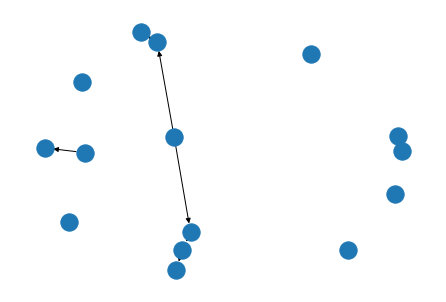

In [48]:
import networkx as nx
%matplotlib inline

data = GraphData.random(5, 4, 3)

# convert to a networkx object
graph = data.to_networkx()

# draw
nx.draw(graph)

# convert back to GraphData object
from_nx = GraphData.from_networkx(graph)
print(from_nx)

From networkx...

# convert back to GraphData object
GraphData.from_networkx(graph)